#### Task: Department-wise Salary Distribution and Managerial Status

- Create a boxplot showing the salary distribution for each department.
- Overlay or color the data points by managerial status (IsManager) to observe how salaries differ for managers and non-managers within departments.
- Summarize any differences in salary spread and median values among departments and between managerial groups

In [5]:
import numpy as np
import pandas as pd
def generate_dataset(num_samples=200, seed=123):
    np.random.seed(seed)

    # Numeric continuous features
    age = np.random.randint(18, 59, size=num_samples)  # Age in years
    salary = np.random.normal(loc=60000, scale=15000, size=num_samples).astype(int)  # Annual salary in USD
    years_experience = np.clip(np.random.normal(loc=10, scale=5, size=num_samples), 0, None).astype(int)  # Years of experience

    # Categorical features
    departments = ['HR', 'IT', 'Finance', 'Marketing', 'Sales']
    department = np.random.choice(departments, size=num_samples)

    education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
    education = np.random.choice(education_levels, size=num_samples, p=[0.2, 0.5, 0.25, 0.05])
    is_manager = (years_experience > 8) & (salary > 65000)
    is_manager = is_manager.astype(int)

    # Build DataFrame
    df = pd.DataFrame({
        'Age': age,
        'Salary': salary,
        'YearsExperience': years_experience,
        'Department': department,
        'EducationLevel': education,
        'IsManager': is_manager
    })

    return df

# Example usage
df = generate_dataset()
df.head()

,Age,Salary,YearsExperience,Department,EducationLevel,IsManager
0,20,41711,13,Marketing,PhD,0
1,46,54457,14,Sales,High School,0
2,52,61852,10,Marketing,Bachelor,0
3,56,52003,8,HR,Bachelor,0
4,35,68518,7,Sales,Bachelor,0


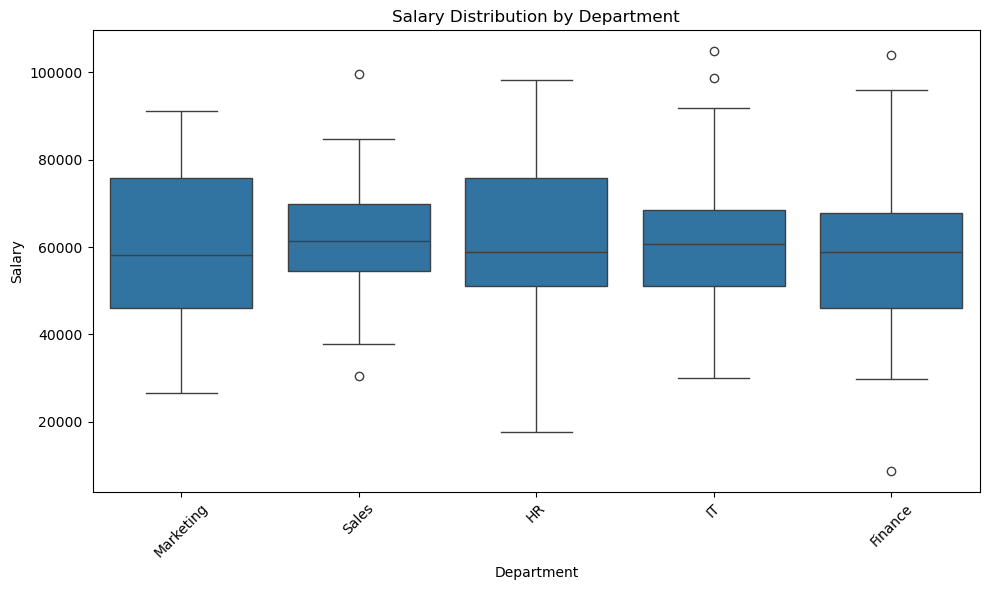

In [6]:
#create a boxplot showing the salary diatirbution for each department
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='Salary')
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

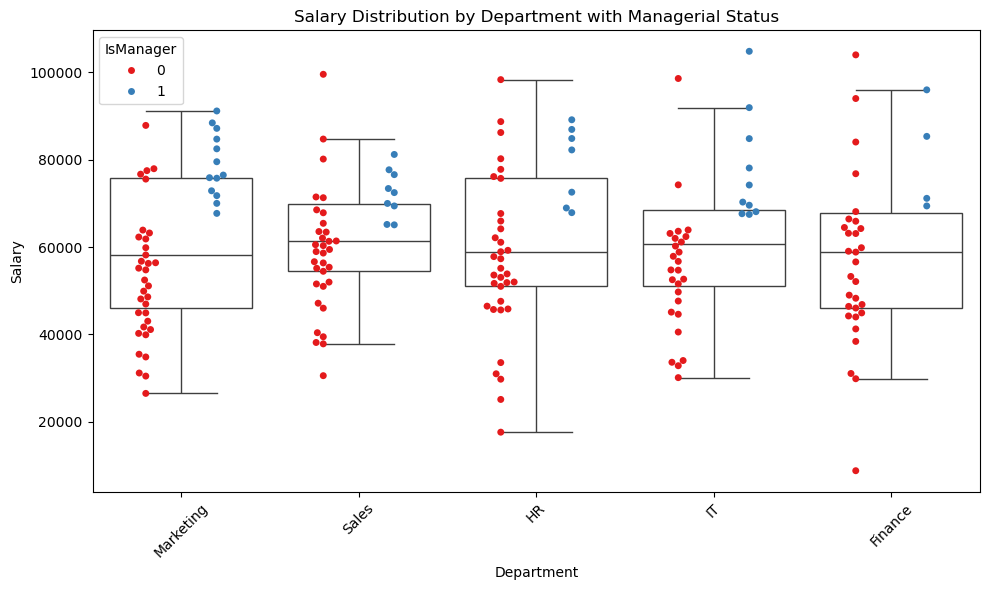

In [7]:
#Overlay or color the data points by managerial status (IsManager) to observe how salaries differ for managers and non-managers within departments.
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Department', y='Salary',
            showcaps=True, boxprops={'facecolor':'None'},
            showfliers=False)

sns.swarmplot(data=df, x='Department', y='Salary',
              hue='IsManager', dodge=True, palette='Set1')

plt.title('Salary Distribution by Department with Managerial Status')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
#Summarize any differences in salary spread and median values among departments and between managerial groups.
import numpy as np
import pandas as pd

def generate_dataset(num_samples=200, seed=123):
    np.random.seed(seed)

    age = np.random.randint(18, 70, size=num_samples)
    salary = np.random.normal(loc=60000, scale=15000, size=num_samples).astype(int)
    years_experience = np.clip(np.random.normal(loc=10, scale=5, size=num_samples), 0, None).astype(int)

    departments = ['HR', 'IT', 'Finance', 'Marketing', 'Sales']
    department = np.random.choice(departments, size=num_samples)

    education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
    education = np.random.choice(education_levels, size=num_samples, p=[0.2, 0.5, 0.25, 0.05])

    is_manager = (years_experience > 8) & (salary > 65000)
    is_manager = is_manager.astype(int)

    df = pd.DataFrame({
        'Age': age,
        'Salary': salary,
        'YearsExperience': years_experience,
        'Department': department,
        'EducationLevel': education,
        'IsManager': is_manager
    })

    return df

df = generate_dataset()

dept_summary = df.groupby('Department')['Salary'].agg(
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
)
dept_summary["IQR"] = dept_summary["q3"] - dept_summary["q1"]

print("=== Salary Summary by Department ===")
print(dept_summary, "\n")

mgr_summary = df.groupby('IsManager')['Salary'].agg(
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
)
mgr_summary["IQR"] = mgr_summary["q3"] - mgr_summary["q1"]

print("=== Salary Summary by Managerial Status (0 = Non-Manager, 1 = Manager) ===")
print(mgr_summary)

=== Salary Summary by Department ===
             median       q1        q3       IQR
Department                                      
Finance     60542.5  49054.0  68757.25  19703.25
HR          60232.0  52597.0  71116.00  18519.00
IT          59471.0  49737.0  66008.00  16271.00
Marketing   57904.0  48185.0  65029.00  16844.00
Sales       59219.0  48224.0  70012.00  21788.00 

=== Salary Summary by Managerial Status (0 = Non-Manager, 1 = Manager) ===
            median       q1       q3      IQR
IsManager                                    
0          56989.0  47946.5  63671.0  15724.5
1          72293.0  68317.0  76580.0   8263.0
